<h2>Exoplanet Prediction Using Kepler Labelled Time Series Data With Machine Learning Algorithms</h2>
<strong><i>Author: Mesuga, Reymond R.</i></strong><br>
<a href="https://github.com/Rey-commits" target="_blank">GitHub</a> | <a href="https://www.linkedin.com/in/reymond-r-21410/" target="_blank">LinkedIn</a> | <a href="https://rey-commits.web.app/" target="_blank">Website</a>

![](https://astrobiology.nasa.gov/uploads/filer_public_thumbnails/filer_public/e0/99/e0994f77-66cf-460f-8de3-fe95a2b78a97/keplerslideshow.jpg__1240x510_q85_crop_subsampling-2.jpg)

<strong>About the Dataset</strong><br>
The dataset used in this project was gathered from a Kaggle Repository entitled <a href="https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data">Exoplanet Hunting in Deep Space</a> which was polished and published by <a href="https://github.com/winterdelta">Winter Delta (WΔ)</a>. The dataset are derived from the observations made by NASA Kepler space telescope.

The data describe the change in flux (light intensity) of several starts. Each star has a binary label of `1` or `2`. The star that have at least one confirmed exoplanet are labeled as `2`. Otherwise, the label is `1`.

Planets themeselves do not emit light, but the starts that they orbit do. If the said start is watched over several months or years, there may be a regular "dimming" of the flux (light intensity). This is evidence that there may be an orbiting around the star; such a start could be considered to be `candidate` system.

![](https://www.nasa.gov/sites/default/files/images/656348main_ToV_transit_diag_full.jpg)

The figure above shows a good demonstration on how potential candidate system are predicted. The rotation of the planet around the star affect its light intensiy over time resulting to a change in flux.

Trainset:

- 5087 rows or observations.
- 3198 columns or features.
- Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
- 37 confirmed exoplanet-stars and 5050 non-exoplanet-stars.

Testset:

- 570 rows or observations.
- 3198 columns or features.
- Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
- 5 confirmed exoplanet-stars and 565 non-exoplanet-stars.


<strong>Installing the Required Libraries</strong>

In [1]:
# !pip install pandas numpy plotly matplotlib seaborn --quiet

In [2]:
# !pip install opendatasets scikit-learn --quiet --upgrade

<strong>Importing the Required Libraries</strong>

In [3]:
import plotly.express as px
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<strong>Downloading the Data</strong><br>
The dataset is available at https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data .


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [4]:
od.download("https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data")

Skipping, found downloaded files in "./kepler-labelled-time-series-data" (use force=True to force download)


The dataset contains two file namely `exoTrain.csv` and `exoTest.csv.`

In [5]:
os.listdir("kepler-labelled-time-series-data")

['exoTrain.csv', 'exoTest.csv']

Obviously, `exoTrain.csv` is the training set. However, i would like to make a new data frame for validation set which will be gathered from a portion of training set. That's why i name its variable as `train_val_df`.

In [6]:
train_val_df = pd.read_csv("kepler-labelled-time-series-data/exoTrain.csv")
test_df = pd.read_csv("kepler-labelled-time-series-data/exoTest.csv")

In [7]:
train_val_df

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0         2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1         2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2         2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3         2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4         2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   
...     ...      ...      ...      ...      ...      ...      ...     ...   
5082      1   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   
5083      1   989.75   891.01   908.53   851.83   755.11   615.78  595.77   
5084      1   273.39   278.00   261.73   236.99   280.73   264.90  252.92   
5085      1     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85   
5086      1   323.28   306.36   293.16   287.67   249.89   218.30  188.86   

       FLUX.8  FLUX.9  FLUX.10  FLUX.11  FLUX.12  FLUX.13  FLUX.14  FLUX.15  \
0      -96.27  -79.89  -160.17  -207.47  -154.88  -173.71  -146.56  -120.26   
1      -85.33  -83.97   -73.38   -86.51   -74.97   -73.15   -86.13   -76.57   
2      486.39  436.56   484.39   469.66   462.30   492.23   441.20   483.17   
3      311.31  312.42   323.33   311.14   326.19   313.11   313.89   317.96   
4    -1022.71 -989.57  -970.88  -933.30  -889.49  -888.66  -853.95  -800.91   
...       ...     ...      ...      ...      ...      ...      ...      ...   
5082   -49.25  -30.92   -11.88    -4.85     3.88    16.85    26.54    36.70   
5083   458.87  492.84   384.34   288.95   257.42   208.06   224.73   160.31   
5084   254.88  237.60   238.51   225.68   199.75   177.53   211.27   190.35   
5085    -0.03    3.28     6.29    -4.33     5.12    -2.24    -3.27    -7.51   
5086   178.93  118.93   130.68   104.50    63.03    72.07   198.89   570.46   

      FLUX.16  FLUX.17  FLUX.18  FLUX.19  FLUX.20  FLUX.21  FLUX.22  FLUX.23  \
0     -102.85   -98.71   -48.42   -86.57    -0.84   -25.85   -67.39   -36.55   
1      -61.27   -37.23   -48.53   -30.96    -8.14    -5.54    15.79    45.71   
2      481.28   535.31   554.34   562.80   540.14   576.34   551.67   556.69   
3      330.92   341.10   360.58   370.29   369.71   339.00   336.24   319.31   
4     -754.48  -717.24  -649.34  -605.71  -575.62  -526.37  -490.12  -458.73   
...       ...      ...      ...      ...      ...      ...      ...      ...   
5082    36.93    38.64    57.02    59.46    78.27   101.61    75.40   115.64   
5083    53.22    61.89    91.62    15.27    -4.70     9.75    37.20    46.91   
5084   226.61   204.55   222.45   204.51   196.45   130.41   155.12   108.21   
5085    -4.22    -0.82    -1.34    -6.76    -9.87    -2.18     6.43    -6.42   
5086   208.08    26.42    44.18    39.85    71.55    81.54    48.87    61.10   

      FLUX.24  FLUX.25  FLUX.26  FLUX.27  FLUX.28  FLUX.29  FLUX.30  FLUX.31  \
0      -87.01   -97.72  -131.59  -134.80  -186.97  -244.32  -225.76  -229.60   
1       10.61    40.66    16.70    15.18    11.98  -203.70    19.13    19.13   
2      550.86   577.33   562.08   577.97   530.67   553.27   538.33   527.17   
3      321.56   308.02   296.82   279.34   275.78   289.67   281.33   285.37   
4     -447.76  -419.54  -410.76  -404.10  -425.38  -397.29  -412.73  -446.49   
...       ...      ...      ...      ...      ...      ...      ...      ...   
5082   130.04   148.42   190.33   203.23   234.36   272.32   299.24   279.73   
5083    43.00    55.41   175.08   133.64   218.98   277.05   270.98   112.98   
5084    92.93    99.46    76.12    73.34    29.25    10.76    22.68    46.29   
5085    -6.75    -3.84    -0.56    -5.66    -4.30    -7.31    -5.81   -11.12   
5086    49.82    38.50    28.64    20.10    15.07    33.55    36.00   -29.34   

      FLUX.32  FLUX.33  FLUX.34  FLUX.35  FLUX.36  FLUX.37  FLUX.38  FLUX.39  \
0     -253.48  -145.74  -145.74    30.47  -173.39  -187.56  -192.88  -182.76   
1       19.13    19.13    19.13    17.02    -8.50 

In [8]:
test_df

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7  \
0        2   119.88   100.21    86.46    48.68    46.12    39.39    18.57   
1        2  5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39   
2        2   844.48   817.49   770.07   675.01   605.52   499.45   440.77   
3        2  -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22   
4        2   -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   
..     ...      ...      ...      ...      ...      ...      ...      ...   
565      1   374.46   326.06   319.87   338.23   251.54   209.84   186.35   
566      1    -0.36     4.96     6.25     4.20     8.26    -9.53   -10.10   
567      1   -54.01   -44.13   -41.23   -42.82   -39.47   -24.88   -31.14   
568      1    91.36    85.60    48.81    48.69    70.05    22.30    11.63   
569      1  3071.19  2782.53  2608.69  2325.47  2089.37  1769.56  1421.09   

      FLUX.8   FLUX.9  FLUX.10  FLUX.11  FLUX.12  FLUX.13  FLUX.14  FLUX.15  \
0       6.98     6.63   -21.97   -23.17   -29.26   -33.99    -6.25   -28.12   
1    5569.47  5550.44  5458.80  5329.39  5191.38  5031.39  4769.89  4419.66   
2     362.95   207.27   150.46    85.49   -20.12   -35.88   -65.59   -15.12   
3    -746.50  -709.53  -679.56  -706.03  -720.56  -631.12  -659.16  -672.03   
4     -45.20    -5.04    14.62   -19.52   -11.43   -49.80    25.84    11.62   
..       ...      ...      ...      ...      ...      ...      ...      ...   
565   167.46   135.45   107.28    95.81    78.93    86.46    78.54    88.59   
566    -4.54   -11.55   -10.48   -19.06   -18.59   -22.66   -24.26   -24.22   
567   -24.71   -13.12   -14.78   -13.55   -10.72   -18.62    -7.90    -7.65   
568    37.86    28.27    -4.36    10.24   -10.75    -5.26   -37.81     2.25   
569  1142.09   902.31   714.47   547.28   418.19   243.19   202.78   123.84   

     FLUX.16  FLUX.17  FLUX.18  FLUX.19  FLUX.20  FLUX.21  FLUX.22  FLUX.23  \
0     -27.24   -32.28   -12.29   -16.57   -23.86    -5.69     9.24    35.52   
1    4218.92  3924.73  3605.30  3326.55  3021.20  2800.61  2474.48  2258.33   
2      16.60   -25.70    61.88    53.18    64.32    72.38   100.35    67.26   
3    -665.06  -667.94  -660.84  -672.75  -644.91  -680.53  -620.50  -570.34   
4       3.18    -9.59    14.49     8.82    32.32   -28.90   -28.90   -14.09   
..       ...      ...      ...      ...      ...      ...      ...      ...   
565    41.51    51.28   102.65   108.90    69.54    83.50    32.09    64.06   
566   -32.34   -28.79   -39.34   -46.62   -46.25   -44.37   -50.59   -55.80   
567    -0.22     7.78    -0.22   -12.68   -12.69     4.38   -10.19    -4.42   
568   -36.31    -8.40   -14.20   -37.67   -32.72    35.61    57.47    94.94   
569     0.44  -122.94   118.91  -185.06  -119.35   101.65   103.12   366.09   

     FLUX.24  FLUX.25  FLUX.26  FLUX.27  FLUX.28  FLUX.29  FLUX.30  FLUX.31  \
0      81.20   116.49   133.99   148.97   174.15   187.77   215.30   246.80   
1    1951.69  1749.86  1585.38  1575.48  1568.41  1661.08  1977.33  2425.62   
2      14.71   -16.41  -147.46  -231.27  -320.29  -407.82  -450.48  -146.99   
3    -530.00  -537.88  -578.38  -532.34  -532.38  -491.03  -485.03  -427.19   
4     -30.87   -18.99   -38.60   -27.79     9.65    29.60     7.88    42.87   
..       ...      ...      ...      ...      ...      ...      ...      ...   
565    67.07    19.60    48.39    59.93    18.03    83.06    83.40   -70.29   
566   -62.28   -64.81   -63.29   -67.64   -66.05   -62.19   -60.25   -64.50   
567    -5.79    -2.00     4.39    -6.10    -2.84    -6.49    -6.31     0.04   
568    86.89    65.85    93.39    36.88    53.91    44.60   -41.26   -26.69   
569   259.44   288.72   548.72   485.94   474.25   653.09   734.09   343.03   

     FLUX.32  FLUX.33  FLUX.34  FLUX.35  FLUX.36  FLUX.37  FLUX.38  FLUX.39  \
0     -56.68   -56.68   -56.68   -52.05   -31.52   -31.15   -48.53   -38.93   
1    2889.61  3847.64  3847.64  3741.20  3453.47  3202.61  2923.73  2694.84

<strong>Informations About the Data</strong>

In [9]:
train_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 13.9 MB


The dataset seems to have no missing values.

## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries.

<strong>Light Intensity of Stars With Exoplanet Over Time</strong>

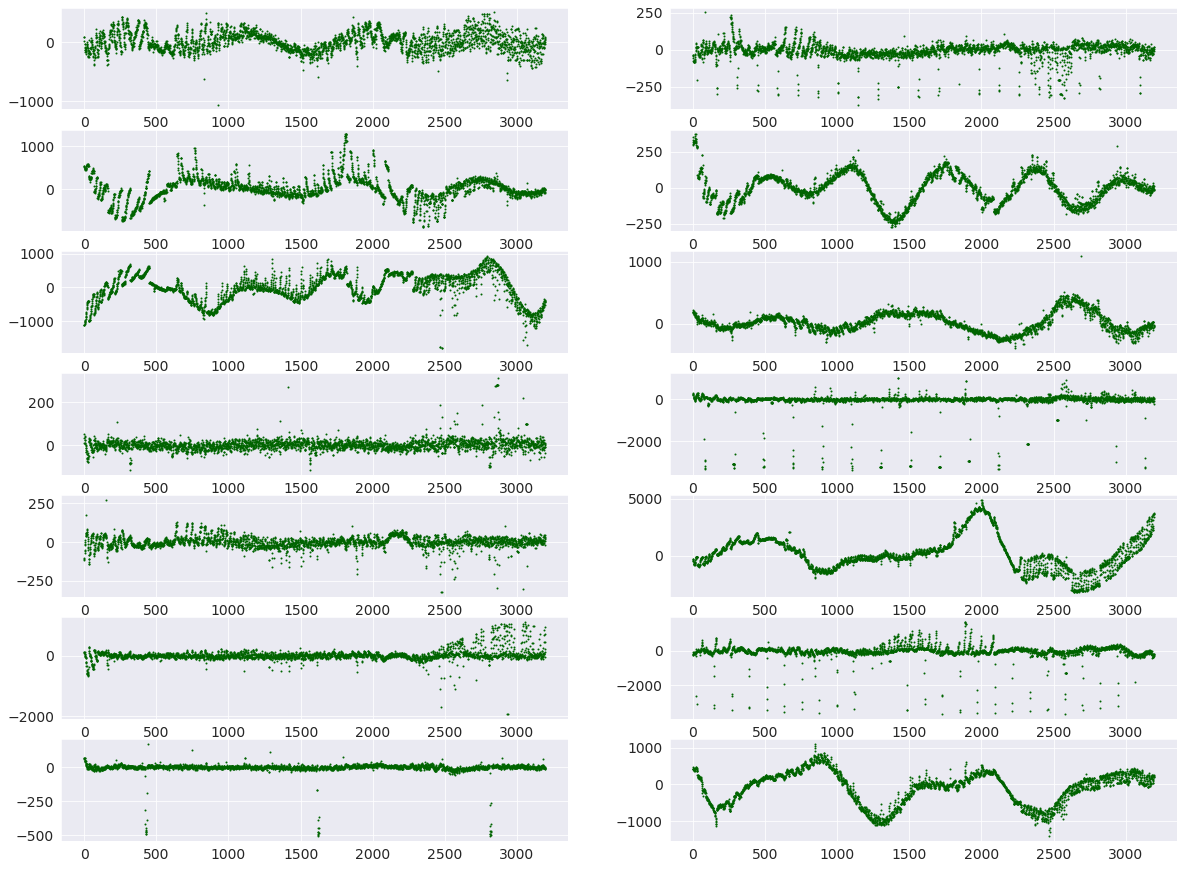

In [11]:
fig = plt.figure(figsize=(20,40))
for i in range(14):
    plot = fig.add_subplot(18,2,i+1)
    plot.scatter(np.arange(3197),train_val_df[train_val_df["LABEL"]==2].iloc[i,1:],s=1, c="darkgreen")

<strong>Light Intensity of Stars Without Exoplanet Over Time</strong>

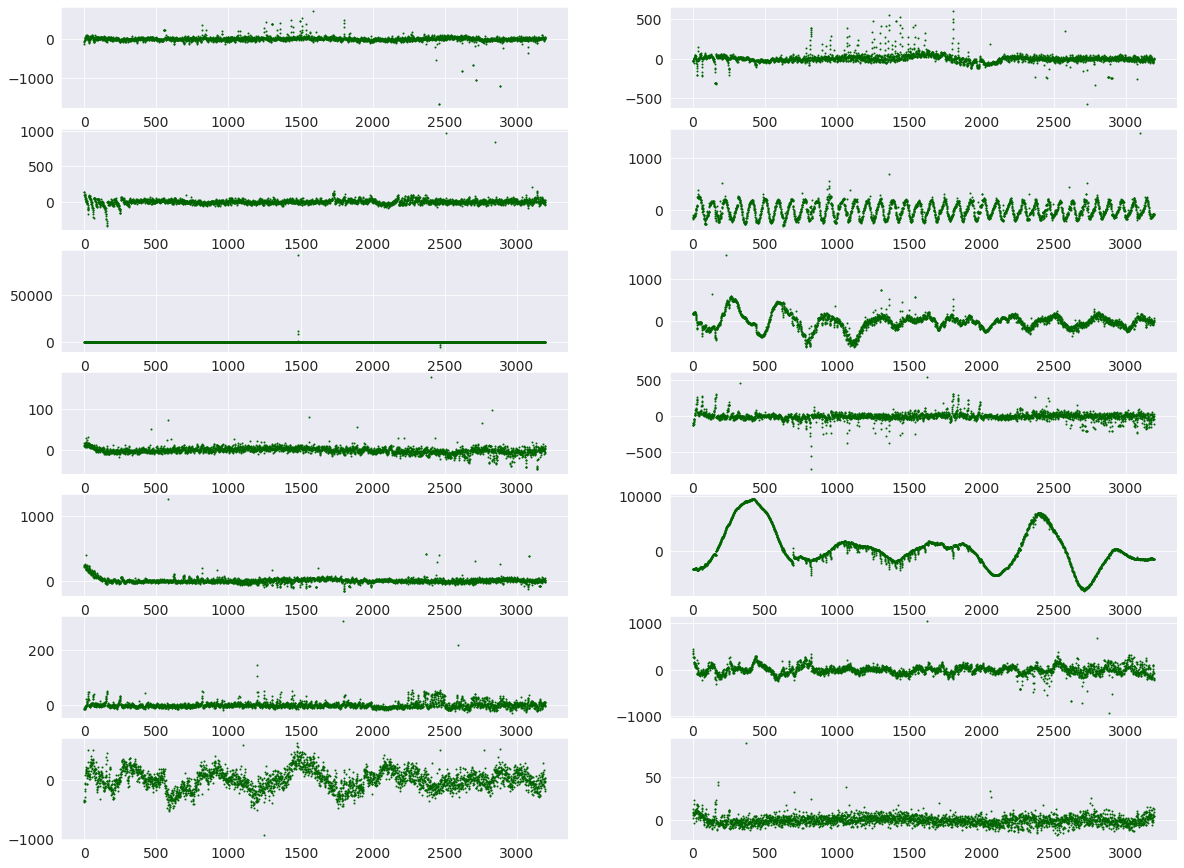

In [12]:
fig = plt.figure(figsize=(20,40))
for i in range(14):
    plot = fig.add_subplot(18,2,i+1)
    plot.scatter(np.arange(3197),train_val_df[train_val_df["LABEL"]==1].iloc[i,1:],s=1, c="darkgreen")

As observed on the above visualizations, starts with conformed expolanet often exhibits fluctuations on its light intensity. On the other hand, some of the stars without exoplanet exhibit also this kind of fluctuation but not very often as the starts with exoplanet.

<AxesSubplot:title={'center':'No. of Stars With(2) and Without(1) Exoplanet'}, xlabel='LABEL', ylabel='count'>

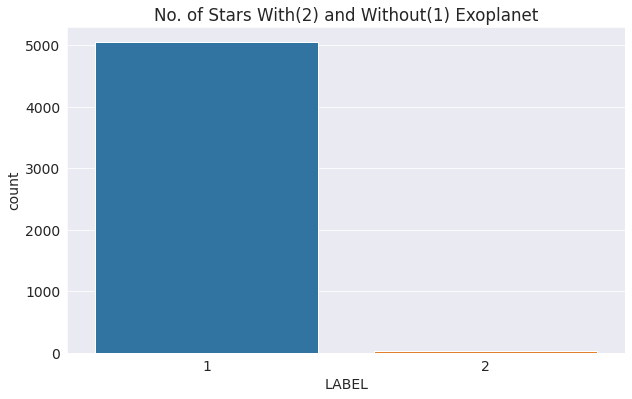

In [13]:
plt.title("No. of Stars With(2) and Without(1) Exoplanet")
sns.countplot(x=train_val_df["LABEL"])

There is a huge imbalance on the number of stars with and without exoplanet.

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_df, val_df = train_test_split(train_val_df, test_size=0.11205, random_state=42)

In [16]:
print("train_df.shape :", train_df.shape)
print("val_df.shape :", val_df.shape)
print("test_df.shape :", test_df.shape)

train_df.shape : (4517, 3198)
val_df.shape : (570, 3198)
test_df.shape : (570, 3198)


In [17]:
train_df

LABEL  FLUX.1  FLUX.2  FLUX.3  FLUX.4  FLUX.5  FLUX.6  FLUX.7  FLUX.8  \
43        1    9.71   16.51   12.25   13.08    9.25   12.31   16.98   13.65   
210       1  -17.04  -11.19  -16.34  -16.08   -8.87  -10.78  -11.01   -7.96   
3166      1   74.33   63.72   72.60   66.82   74.62   67.49   94.91   83.66   
354       1  -31.66  -21.94  -41.13  -25.19  -58.31  -45.33  -20.50  -38.56   
3706      1  291.15  302.18  208.22  181.82  170.11  101.65    7.47  -46.37   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
4426      1  399.59  401.71  382.32  294.01  251.74  219.00  131.45  123.46   
466       1    8.86    7.25    3.55    8.23    0.85   -7.62   -9.23  -12.65   
3092      1   -2.98  -19.14   -9.68  -24.80  -19.91  -33.07  -32.98  -39.09   
3772      1    9.01   -4.29    4.34   -1.24    0.36    2.25    0.20    6.75   
860       1 -113.25 -203.50 -117.69 -248.52 -209.45 -311.94 -314.89 -313.70   

      FLUX.9  FLUX.10  FLUX.11  FLUX.12  FLUX.13  FLUX.14  FLUX.15  FLUX.16  \
43      7.09    13.48    12.47    14.78    19.82     6.55    20.36    10.18   
210    -1.76    -8.44    -7.43    -6.49   -12.53   -12.30    -1.90    -0.45   
3166   93.41    98.56    50.17    91.29    62.64    52.64    63.39    69.37   
354   -29.49   -10.42   -23.19   -32.03   -29.02   -21.25   -22.49    -0.55   
3706 -115.18  -147.57  -132.14  -209.57  -196.66  -170.01  -133.28   -73.85   
...      ...      ...      ...      ...      ...      ...      ...      ...   
4426   57.10   -13.44   -18.97   -37.67   -30.07   -60.02   -45.36  -113.67   
466   -17.84   -11.64   -15.06    -4.39    -5.71   -20.01   -11.20    -2.96   
3092  -32.16   -36.51   -57.10   -47.93   -41.68   -50.64   -40.87   -42.52   
3772   -6.04     0.73     3.41    -1.46     3.98    -3.73     3.09    -3.59   
860  -254.87  -274.78  -381.06  -306.56  -237.80  -240.34  -146.31   -68.92   

      FLUX.17  FLUX.18  FLUX.19  FLUX.20  FLUX.21  FLUX.22  FLUX.23  FLUX.24  \
43      28.67    13.25    16.34    15.07    11.32    25.27    12.15     8.73   
210     -4.69     1.79     4.76    11.45     8.24    32.60    10.78    34.09   
3166    54.17    82.42    79.91    74.99    59.94    56.68    31.25    52.31   
354     -5.78     1.80    32.37    32.64    55.83    45.12    40.31    44.86   
3706     6.25   118.52   119.73   193.63   357.36   412.53   535.36   579.53   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4426  -116.40   -52.45   -20.63   -22.05   -34.24   -32.45   -63.24  -122.63   
466     -9.63     2.49    -3.16    -7.00    -6.78    11.82    -4.96    -1.20   
3092   -28.26     8.47    19.25    59.74    83.82   134.82   191.02   245.00   
3772    -2.67    -3.67     2.98    -9.02    -3.94     3.88    -3.22    -4.19   
860    -23.48    14.47   142.17   156.47   179.87   213.98   189.72   179.11   

      FLUX.25  FLUX.26  FLUX.27  FLUX.28  FLUX.29  FLUX.30  FLUX.31  FLUX.32  \
43      16.32    14.61    32.76    13.82     9.82    13.84    16.79    17.47   
210     24.55    20.11    21.81    24.21    32.91    40.17    34.48    33.95   
3166   -11.41   -29.66   -68.63  -117.30  -117.74  -149.47  -208.13  -234.60   
354     21.45    13.31    -5.36    -5.00   -25.88   -56.20   -80.23   -96.58   
3706   666.52   776.26   900.10   983.39  1100.01  1214.50  1318.16   173.57   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4426   -97.75  -103.07  -171.21  -252.90  -372.47  -369.82  -481.50   101.47   
466      7.31     9.31    -1.15    -7.47    -4.40    -9.17    -9.63    -9.71   
3092   298.06   348.98   454.37   465.93   529.78   594.85   651.20   690.00   
3772    -2.12    -0.15    -2.19    -4.82    -6.41    -7.04    -6.21    -2.57   
860     59.19    48.06   -25.98  -115.27   -97.31  -167.28  -182.00  -262.03   

      FLUX.33  FLUX.34  FLUX.35  FLUX.36  FLUX.37  FLUX.38  FLUX.39  FLUX.40  \
43       8.17    10.31     8.86    10.05    10.36     9.06     4.37     8.37   
210     -8.23    -4.97    

<strong>Identifying Input and Target Columns</strong>

In [18]:
input_cols = list(train_df.columns)[1:-1]
target_col = "LABEL"
print("input_cols =", input_cols)
print("------------------------------")
print("target_col =", target_col)

input_cols = ['FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.4', 'FLUX.5', 'FLUX.6', 'FLUX.7', 'FLUX.8', 'FLUX.9', 'FLUX.10', 'FLUX.11', 'FLUX.12', 'FLUX.13', 'FLUX.14', 'FLUX.15', 'FLUX.16', 'FLUX.17', 'FLUX.18', 'FLUX.19', 'FLUX.20', 'FLUX.21', 'FLUX.22', 'FLUX.23', 'FLUX.24', 'FLUX.25', 'FLUX.26', 'FLUX.27', 'FLUX.28', 'FLUX.29', 'FLUX.30', 'FLUX.31', 'FLUX.32', 'FLUX.33', 'FLUX.34', 'FLUX.35', 'FLUX.36', 'FLUX.37', 'FLUX.38', 'FLUX.39', 'FLUX.40', 'FLUX.41', 'FLUX.42', 'FLUX.43', 'FLUX.44', 'FLUX.45', 'FLUX.46', 'FLUX.47', 'FLUX.48', 'FLUX.49', 'FLUX.50', 'FLUX.51', 'FLUX.52', 'FLUX.53', 'FLUX.54', 'FLUX.55', 'FLUX.56', 'FLUX.57', 'FLUX.58', 'FLUX.59', 'FLUX.60', 'FLUX.61', 'FLUX.62', 'FLUX.63', 'FLUX.64', 'FLUX.65', 'FLUX.66', 'FLUX.67', 'FLUX.68', 'FLUX.69', 'FLUX.70', 'FLUX.71', 'FLUX.72', 'FLUX.73', 'FLUX.74', 'FLUX.75', 'FLUX.76', 'FLUX.77', 'FLUX.78', 'FLUX.79', 'FLUX.80', 'FLUX.81', 'FLUX.82', 'FLUX.83', 'FLUX.84', 'FLUX.85', 'FLUX.86', 'FLUX.87', 'FLUX.88', 'FLUX.89', 'FLUX.90', 'FLUX

We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [19]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [20]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [21]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

<strong>Scaling the Numerical Values on Each Column</strong><br>
Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

In [22]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
numeric_cols, len(numeric_cols)

(['FLUX.1',
  'FLUX.2',
  'FLUX.3',
  'FLUX.4',
  'FLUX.5',
  'FLUX.6',
  'FLUX.7',
  'FLUX.8',
  'FLUX.9',
  'FLUX.10',
  'FLUX.11',
  'FLUX.12',
  'FLUX.13',
  'FLUX.14',
  'FLUX.15',
  'FLUX.16',
  'FLUX.17',
  'FLUX.18',
  'FLUX.19',
  'FLUX.20',
  'FLUX.21',
  'FLUX.22',
  'FLUX.23',
  'FLUX.24',
  'FLUX.25',
  'FLUX.26',
  'FLUX.27',
  'FLUX.28',
  'FLUX.29',
  'FLUX.30',
  'FLUX.31',
  'FLUX.32',
  'FLUX.33',
  'FLUX.34',
  'FLUX.35',
  'FLUX.36',
  'FLUX.37',
  'FLUX.38',
  'FLUX.39',
  'FLUX.40',
  'FLUX.41',
  'FLUX.42',
  'FLUX.43',
  'FLUX.44',
  'FLUX.45',
  'FLUX.46',
  'FLUX.47',
  'FLUX.48',
  'FLUX.49',
  'FLUX.50',
  'FLUX.51',
  'FLUX.52',
  'FLUX.53',
  'FLUX.54',
  'FLUX.55',
  'FLUX.56',
  'FLUX.57',
  'FLUX.58',
  'FLUX.59',
  'FLUX.60',
  'FLUX.61',
  'FLUX.62',
  'FLUX.63',
  'FLUX.64',
  'FLUX.65',
  'FLUX.66',
  'FLUX.67',
  'FLUX.68',
  'FLUX.69',
  'FLUX.70',
  'FLUX.71',
  'FLUX.72',
  'FLUX.73',
  'FLUX.74',
  'FLUX.75',
  'FLUX.76',
  'FLUX.77',
  'FLUX.

In [23]:
train_df[numeric_cols].describe()

FLUX.1        FLUX.2        FLUX.3        FLUX.4        FLUX.5  \
count  4.517000e+03  4.517000e+03  4.517000e+03  4.517000e+03  4.517000e+03   
mean   2.161883e+02  2.075013e+02  2.377861e+02  2.568478e+02  2.608008e+02   
std    2.236642e+04  2.270097e+04  2.286636e+04  2.321698e+04  2.413403e+04   
min   -2.278563e+05 -3.154408e+05 -2.840018e+05 -2.340069e+05 -4.231956e+05   
25%   -4.311000e+01 -4.170000e+01 -3.959000e+01 -3.683000e+01 -3.288000e+01   
50%   -8.100000e-01 -1.130000e+00 -9.500000e-01 -4.200000e-01 -8.400000e-01   
75%    4.823000e+01  4.339000e+01  4.215000e+01  3.937000e+01  3.945000e+01   
max    1.439240e+06  1.453319e+06  1.468429e+06  1.495750e+06  1.510937e+06   

             FLUX.6        FLUX.7        FLUX.8        FLUX.9       FLUX.10  \
count  4.517000e+03  4.517000e+03  4.517000e+03  4.517000e+03  4.517000e+03   
mean   2.539696e+02  2.216239e+02  2.206023e+02  2.258656e+02  2.410663e+02   
std    2.524267e+04  2.527627e+04  2.396170e+04  2.194414e+04  2.020802e+04   
min   -5.975521e+05 -6.724046e+05 -5.790136e+05 -3.973882e+05 -2.163641e+05   
25%   -3.411000e+01 -2.874000e+01 -2.800000e+01 -2.745000e+01 -2.857000e+01   
50%   -9.800000e-01 -9.200000e-01 -7.500000e-01 -6.200000e-01 -9.600000e-01   
75%    3.532000e+01  3.348000e+01  3.147000e+01  3.006000e+01  2.826000e+01   
max    1.508152e+06  1.465743e+06  1.416827e+06  1.342888e+06  1.263870e+06   

            FLUX.11       FLUX.12       FLUX.13        FLUX.14        FLUX.15  \
count  4.517000e+03  4.517000e+03  4.517000e+03    4517.000000    4517.000000   
mean   2.085619e+02  2.043227e+02  1.744088e+02     161.186090     119.647038   
std    1.902130e+04  1.831783e+04  1.792246e+04   17195.817186   17291.786204   
min   -2.279016e+05 -2.996757e+05 -4.453612e+05 -557042.690000 -695994.840000   
25%   -2.863000e+01 -2.760000e+01 -2.659000e+01     -28.880000     -26.160000   
50%   -1.380000e+00 -9.800000e-01 -1.030000e+00      -1.680000      -0.300000   
75%    2.657000e+01  2.736000e+01  2.918000e+01      26.830000      29.810000   
max    1.178975e+06  1.082266e+06  1.003162e+06  914551.000000  833016.000000   

             FLUX.16        FLUX.17        FLUX.18        FLUX.19  \
count    4517.000000    4517.000000    4517.000000    4517.000000   
mean       41.116062     -16.096166     -62.106476     -31.605696   
std     17787.558379   18035.102941   17652.281774   16643.974002   
min   -815633.560000 -880865.850000 -892477.410000 -851507.680000   
25%       -26.650000     -24.270000     -23.970000     -24.300000   
50%        -0.270000       0.130000       0.720000       0.610000   
75%        29.330000      31.190000      31.280000      32.000000   
max    760766.000000  690691.500000  634772.500000  600839.000000   

             FLUX.20        FLUX.21        FLUX.22        FLUX.23  \
count    4517.000000    4517.000000    4517.000000    4517.000000   
mean       13.810520      49.972561     114.655997     172.023952   
std     15716.197341   14827.789322   14635.033280   15282.665692   
min   -778025.050000 -588309.250000 -384489.470000 -284614.630000   
25%       -23.570000     -23.350000     -24.260000     -26.310000   
50%         0.480000       0.720000       1.400000       1.340000   
75%        34.160000      37.660000      37.630000      39.660000   
max    580863.000000  580497.500000  597493.500000  625709.000000   

             FLUX.24        FLUX.25        FLUX.26       FLUX.27  \
count    4517.000000    4517.000000    4517.000000  4.517000e+03   
mean      260.771990     318.972442     356.315650  5.509776e+02   
std     15979.454031   17671.579790   18884.719227  2.667138e+04   
min   -178528.000000 -196692.000000 -303841.000000 -3.908970e+05   
25%       -28.580000     -30.170000     -29.180000 -3.330000e+01   
50%         0.560000       1.090000       0.920000  1.110000e+00   
75%        38.470000      40.160000      41.870000  4.363000e+01   
max    738302.000000  835844.000000  854254.000000  1.412850e+06   

  

Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(train_val_df[numeric_cols])

MinMaxScaler()

In [27]:
# print('Minimum:')
# list(scaler.data_min_)

In [28]:
# print('Maximum:')
# list(scaler.data_max_)

We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

In [29]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [30]:
train_inputs.describe()

FLUX.1       FLUX.2       FLUX.3       FLUX.4       FLUX.5  \
count  4517.000000  4517.000000  4517.000000  4517.000000  4517.000000   
mean      0.136808     0.178457     0.162197     0.135432     0.218939   
std       0.013416     0.012834     0.013048     0.013422     0.012478   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.136653     0.178317     0.162039     0.135262     0.218787   
50%       0.136678     0.178339     0.162061     0.135283     0.218803   
75%       0.136707     0.178365     0.162086     0.135306     0.218824   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            FLUX.6       FLUX.7       FLUX.8       FLUX.9      FLUX.10  \
count  4517.000000  4517.000000  4517.000000  4517.000000  4517.000000   
mean      0.283898     0.314584     0.290221     0.228478     0.149759   
std       0.011988     0.011822     0.012006     0.012610     0.013597   
min       0.000000     0.000000     0.000000     0.000000     0.004014   
25%       0.283762     0.314467     0.290096     0.228332     0.149577   
50%       0.283777     0.314480     0.290110     0.228347     0.149596   
75%       0.283795     0.314496     0.290126     0.228365     0.149615   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           FLUX.11      FLUX.12      FLUX.13      FLUX.14      FLUX.15  \
count  4517.000000  4517.000000  4517.000000  4517.000000  4517.000000   
mean      0.162139     0.216999     0.307579     0.378640     0.455271   
std       0.013520     0.013255     0.012373     0.011685     0.011309   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.161971     0.216831     0.307441     0.378511     0.455176   
50%       0.161990     0.216851     0.307458     0.378529     0.455193   
75%       0.162010     0.216871     0.307479     0.378548     0.455212   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           FLUX.16      FLUX.17      FLUX.18      FLUX.19      FLUX.20  \
count  4517.000000  4517.000000  4517.000000  4517.000000  4517.000000   
mean      0.517429     0.560495     0.584328     0.586276     0.572556   
std       0.011284     0.011476     0.011558     0.011460     0.011565   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.517386     0.560490     0.584353     0.586281     0.572528   
50%       0.517403     0.560505     0.584369     0.586298     0.572546   
75%       0.517421     0.560525     0.584389     0.586320     0.572570   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           FLUX.21      FLUX.22      FLUX.23      FLUX.24      FLUX.25  \
count  4517.000000  4517.000000  4517.000000  4517.000000  4517.000000   
mean      0.503385     0.391661     0.312841     0.195008     0.190803   
std       0.012686     0.014904     0.016788     0.017429     0.017115   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.503322     0.391519     0.312623     0.194692     0.190465   
50%       0.503342     0.391545     0.312654     0.194724     0.190495   
75%       0.503374     0.391582     0.312696     0.194765     0.190533   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           FLUX.26      FLUX.27      FLUX.28      FLUX.29      FLUX.30  \
count  4517.000000  4517.000000  4517.000000  4517.000000  4517.000000   
mean      0.262670     0.217019     0.227995     0.240583     0.244578   
std       0.016307     0.014787     0.015632     0.016859     0.016922   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.262338     0.216695     0.227633     0.240210     0.244241   
50%       0.262364     0.216714     0.227652     0.240230     0.244260   
75%       0.262399     0.216738     0.227677     0.240256     0.244285   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          

## Saving Processed Data to Disk

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [31]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (4517, 3196)
train_targets: (4517,)
val_inputs: (570, 3196)
val_targets: (570,)
test_inputs: (570, 3196)
test_targets: (570,)


In [32]:
!pip install pyarrow --quiet

In [33]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [34]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 17.3 ms, sys: 0 ns, total: 17.3 ms
Wall time: 16 ms


We can read the data back using `pd.read_parquet`.

In [35]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 1.24 s, sys: 345 ms, total: 1.59 s
Wall time: 1.16 s


Let's verify that the data was loaded properly.

Let's verify that the data was loaded properly.

In [36]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (4517, 3196)
train_targets: (4517,)
val_inputs: (570, 3196)
val_targets: (570,)
test_inputs: (570, 3196)
test_targets: (570,)


<strong>Training the Models</strong>

<strong>First Model Training and Evaluation: Random Forest Classifier Model</strong>

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
?RandomForestClassifier

In [38]:
RFC_model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [39]:
import time
training_start = time.perf_counter()
RFC_model.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
train_preds = RFC_model.predict(train_inputs)
test_preds = RFC_model.predict(test_inputs)
val_preds = RFC_model.predict(val_inputs)
prediction_end = time.perf_counter()

test_accuracy_RFC = (test_preds == test_targets).sum().astype(float)/len(test_preds)*100
val_accuracy_RFC = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
train_accuracy_RFC = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100

RFC_train_time = training_end - training_start
RFC_prediction_time = prediction_end - prediction_start
print("RFC's test accuracy is: %3.2f" % (test_accuracy_RFC))
print("RFC's validation accuracy is: %3.2f" % (val_accuracy_RFC))
print("RFC's train accuracy is: %3.2f" % (train_accuracy_RFC))
print("Time consumed for training: %4.3f" % (RFC_train_time))
print("Time consumed for prediction: %6.5f seconds" % (RFC_prediction_time))


RFC's test accuracy is: 99.12
RFC's validation accuracy is: 98.95
RFC's train accuracy is: 100.00
Time consumed for training: 3.045
Time consumed for prediction: 0.49783 seconds


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

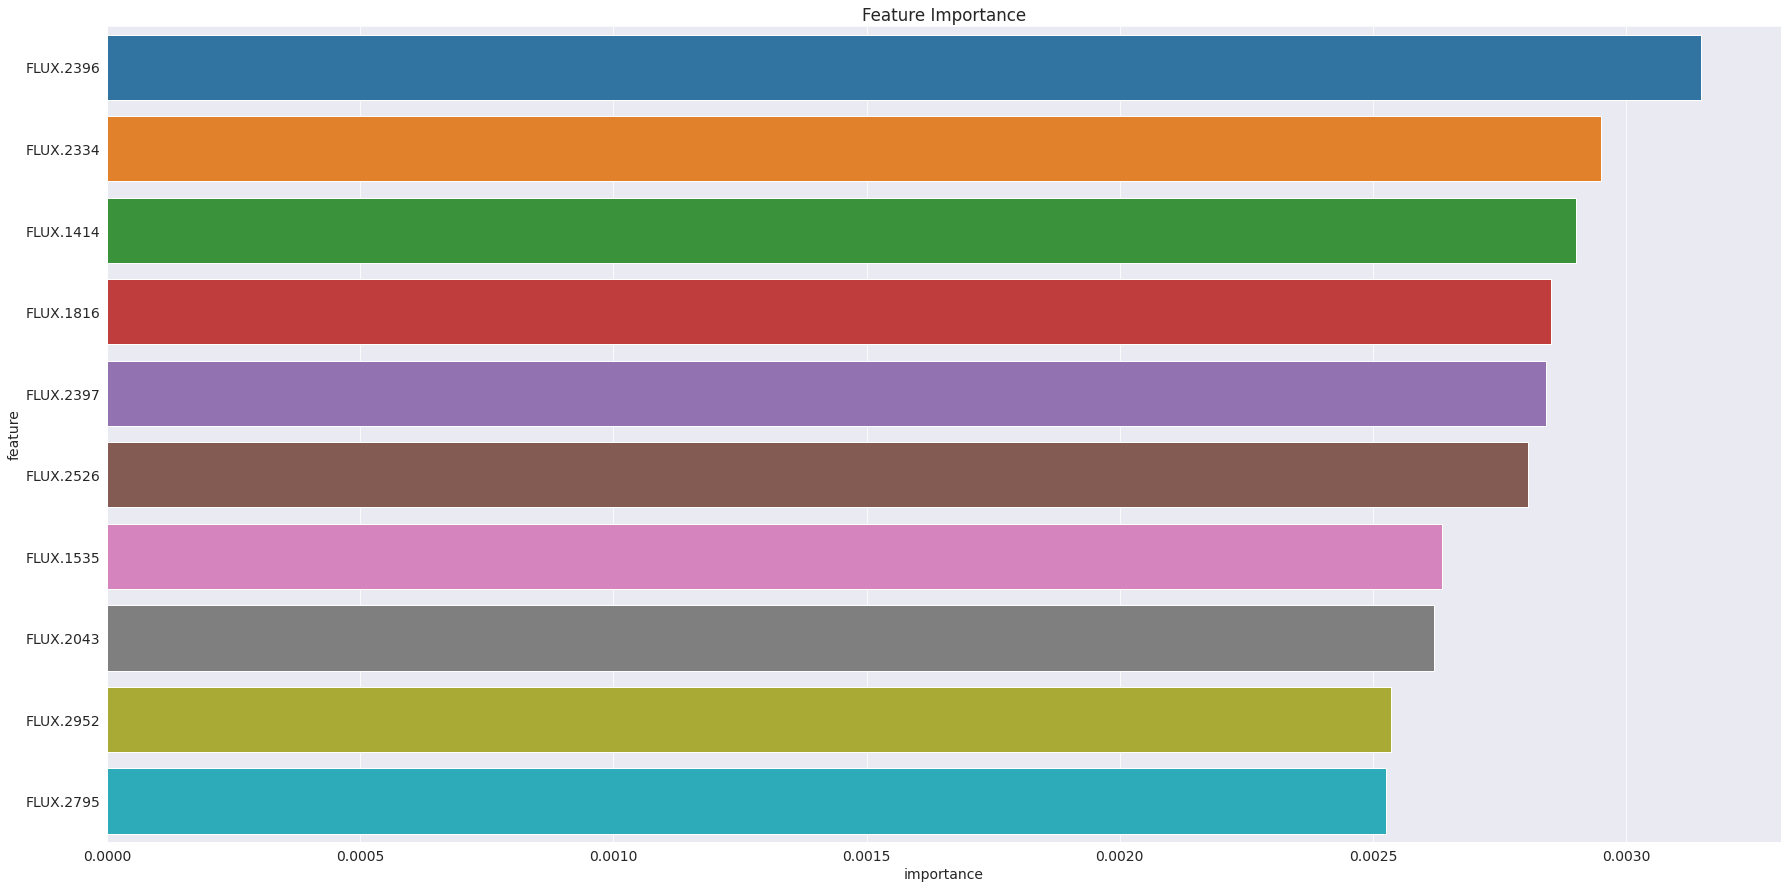

In [40]:
plt.figure(figsize=(30,15))

importance_df = pd.DataFrame({
    "feature": train_inputs.columns,
    "importance": RFC_model.feature_importances_
}).sort_values("importance", ascending=False)
plt.title("Feature Importance")
sns.barplot(data=importance_df.head(10), x="importance", y="feature")

In [41]:
importance_df

feature  importance
2395  FLUX.2396    0.003149
2333  FLUX.2334    0.002950
1413  FLUX.1414    0.002901
1815  FLUX.1816    0.002851
2396  FLUX.2397    0.002843
...         ...         ...
2049  FLUX.2050    0.000000
821    FLUX.822    0.000000
2047  FLUX.2048    0.000000
2045  FLUX.2046    0.000000
3195  FLUX.3196    0.000000

[3196 rows x 2 columns]

<strong>Second Model Training and Evaluation: XGBoost Classifier Model</strong>

In [42]:
from xgboost import XGBClassifier

In [53]:
?XGBClassifier

In [43]:
XGB_model = XGBClassifier(n_jobs=-1, random_state=42)

In [44]:
training_start = time.perf_counter()
XGB_model.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
train_preds = XGB_model.predict(train_inputs)
test_preds = XGB_model.predict(test_inputs)
val_preds = XGB_model.predict(val_inputs)
prediction_end = time.perf_counter()

test_accuracy_XGB = (test_preds == test_targets).sum().astype(float)/len(test_preds)*100
val_accuracy_XGB = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
train_accuracy_XGB = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100

XGB_train_time = training_end - training_start
XGB_prediction_time = prediction_end - prediction_start
print("XGB's test accuracy is: %3.2f" % (test_accuracy_XGB))
print("XGB's validation accuracy is: %3.2f" % (val_accuracy_XGB))
print("XGB's train accuracy is: %3.2f" % (train_accuracy_XGB))
print("Time consumed for training: %4.3f" % (XGB_train_time))
print("Time consumed for prediction: %6.5f seconds" % (XGB_prediction_time))


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:38:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB's test accuracy is: 99.12
XGB's validation accuracy is: 98.95
XGB's train accuracy is: 100.00
Time consumed for training: 47.377
Time consumed for prediction: 0.21907 seconds


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

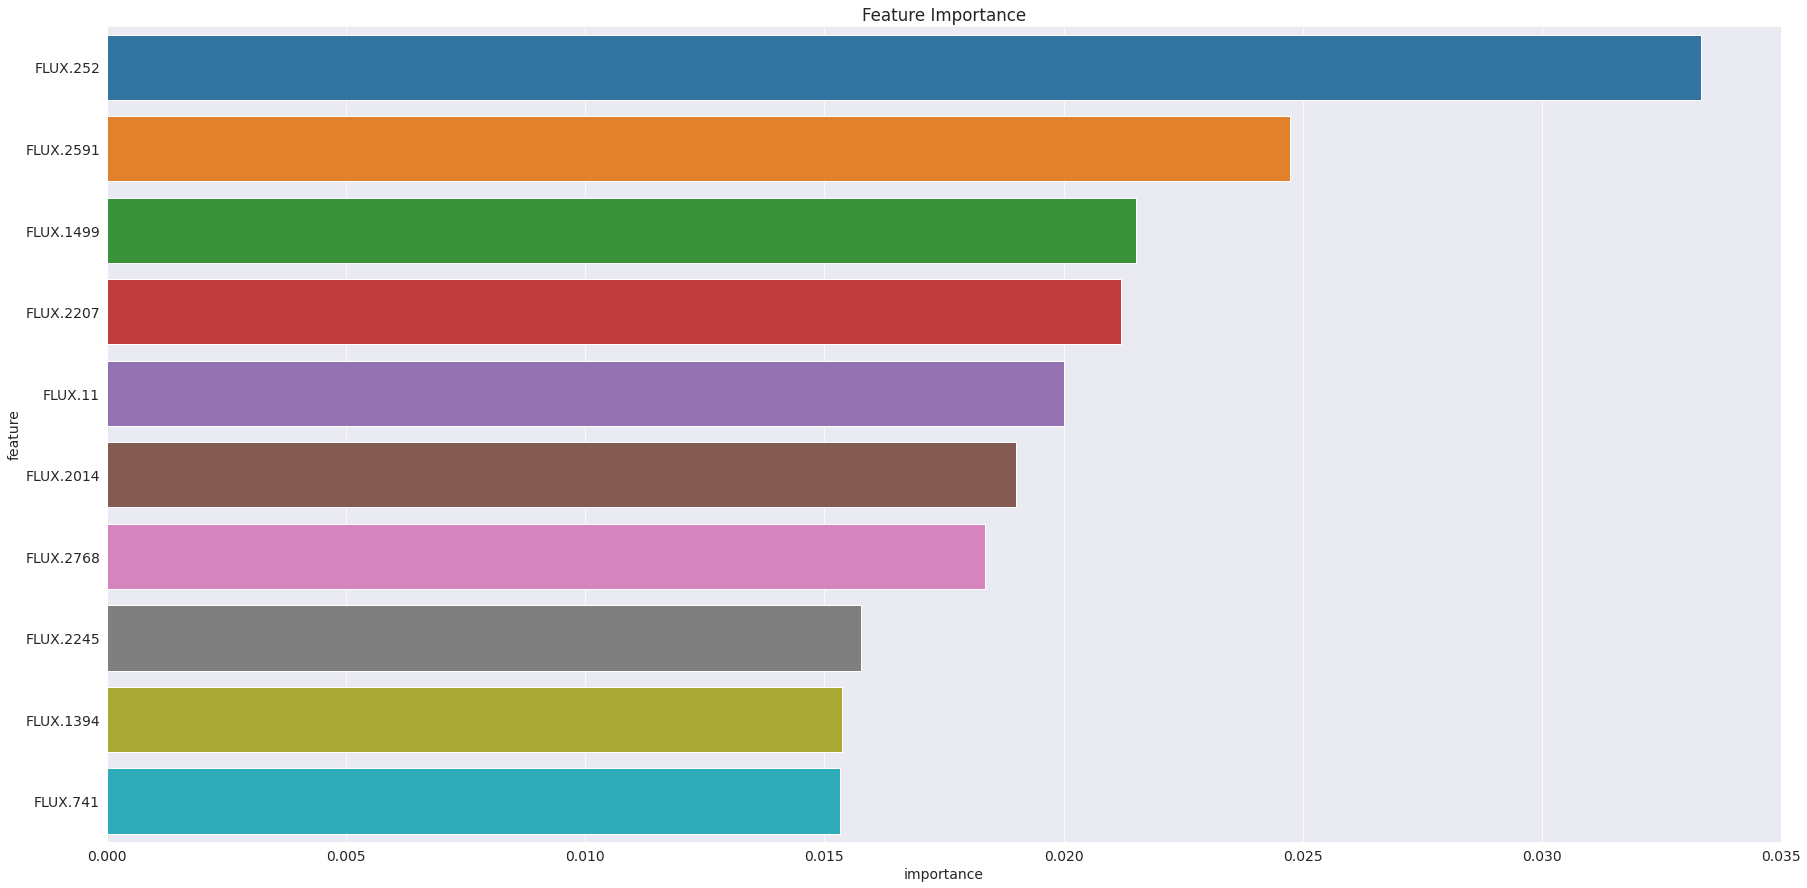

In [49]:
plt.figure(figsize=(30,15))

importance_df = pd.DataFrame({
    "feature": train_inputs.columns,
    "importance": XGB_model.feature_importances_
}).sort_values("importance", ascending=False)
plt.title("Feature Importance")
sns.barplot(data=importance_df.head(10), x="importance", y="feature")

In [50]:
importance_df

feature  importance
251    FLUX.252    0.033338
2590  FLUX.2591    0.024730
1498  FLUX.1499    0.021525
2206  FLUX.2207    0.021211
10      FLUX.11    0.020003
...         ...         ...
1102  FLUX.1103    0.000000
1103  FLUX.1104    0.000000
1104  FLUX.1105    0.000000
1105  FLUX.1106    0.000000
3195  FLUX.3196    0.000000

[3196 rows x 2 columns]

<strong>Third Model Training and Evaluation: Support Vector Machine Classifier Model</strong>

In [45]:
from sklearn.svm import SVC

In [52]:
?SVC

In [46]:
SVC_model = SVC(random_state=42)

In [48]:
training_start = time.perf_counter()
SVC_model.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
train_preds = SVC_model.predict(train_inputs)
test_preds = SVC_model.predict(test_inputs)
val_preds = SVC_model.predict(val_inputs)
prediction_end = time.perf_counter()

test_accuracy_SVC = (test_preds == test_targets).sum().astype(float)/len(test_preds)*100
val_accuracy_SVC = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
train_accuracy_SVC = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100

SVC_train_time = training_end - training_start
SVC_prediction_time = prediction_end - prediction_start
print("SVC's test accuracy is: %3.2f" % (test_accuracy_SVC))
print("SVC's validation accuracy is: %3.2f" % (val_accuracy_SVC))
print("SVC's train accuracy is: %3.2f" % (train_accuracy_SVC))
print("Time consumed for training: %4.3f" % (SVC_train_time))
print("Time consumed for prediction: %6.5f seconds" % (SVC_prediction_time))


SVC's test accuracy is: 99.12
SVC's validation accuracy is: 98.95
SVC's train accuracy is: 99.31
Time consumed for training: 1.185
Time consumed for prediction: 1.41501 seconds


I will add visualization for feature importance of an SVC model if that is possible in the near future.

<strong>Hyperparameter Tuning for Each Model</strong>

<strong>First Model (RFC): Hyperparameter Tuning</strong>

In [55]:
def test_params_RFC(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    
    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)
    
    val_accuracy = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
    train_accuracy = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100
    return train_accuracy, val_accuracy

In [56]:
def test_param_and_plot_RFC(param_name, param_values):
    train_acc, val_acc = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_accuracy, val_accuracy = test_params_RFC(**params)
        train_acc.append(train_accuracy)
        val_acc.append(val_accuracy)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc, 'b-o')
    plt.plot(param_values, val_acc, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])

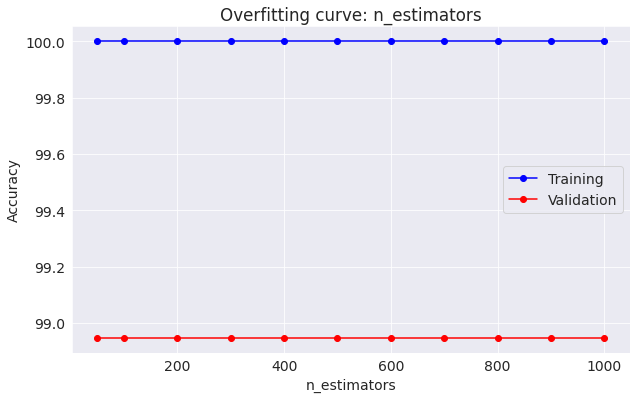

In [58]:
test_param_and_plot_RFC("n_estimators", [50,100,200,300,400,500,600,700,800,900,1000])

Changing the values of `n_estimators` doesn't affect the accuracy so much

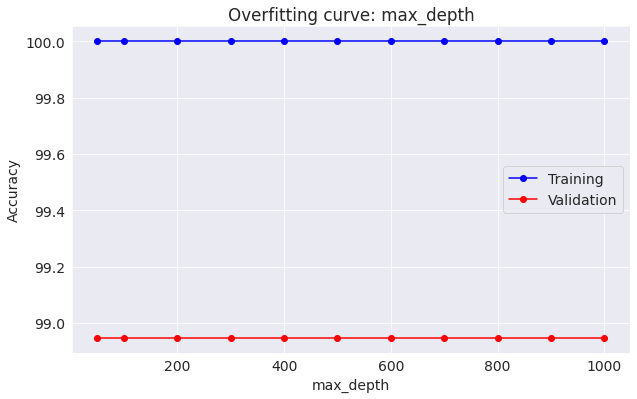

In [59]:
test_param_and_plot_RFC("max_depth", [50,100,200,300,400,500,600,700,800,900,1000])

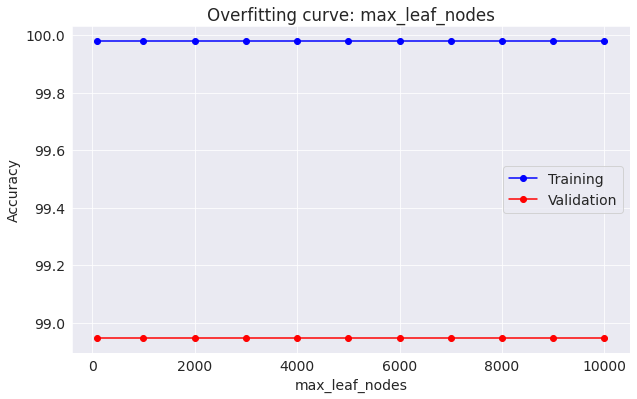

In [60]:
test_param_and_plot_RFC("max_leaf_nodes", [100,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])

There are almost no effect on the accuracy of RFC model when changing the values of `n_estimators`, `max_depth`, and `max_leaf_nodes`

<strong>Second Model (XGB): Hyperparameter Tuning</strong>

In [74]:
def test_params_XGB(**params):
    model = XGBClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    
    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)
    
    val_accuracy = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
    train_accuracy = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100
    return train_accuracy, val_accuracy

In [75]:
def test_param_and_plot_XGB(param_name, param_values):
    train_acc, val_acc = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_accuracy, val_accuracy = test_params_XGB(**params)
        train_acc.append(train_accuracy)
        val_acc.append(val_accuracy)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc, 'b-o')
    plt.plot(param_values, val_acc, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])

[01:09:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:11:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:12:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:13:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:15:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:18:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:20:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:23:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


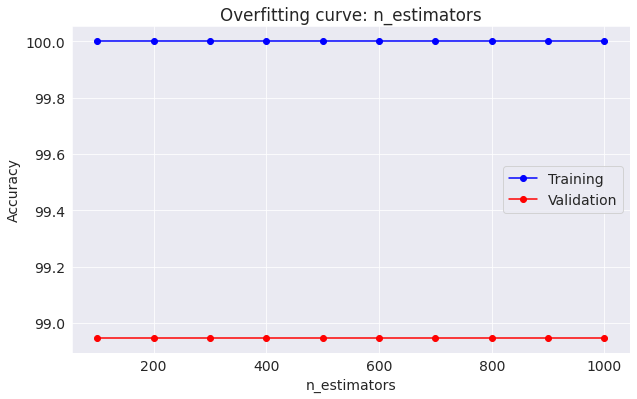

In [77]:
test_param_and_plot_XGB("n_estimators", [100,200,300,400,500,600,700,800,900,1000])

In [ ]:
#test_param_and_plot_XGB("max_depth", [50,100,200,300,400,500,600,700,800,900,1000])

<strong>Third Model (SVC): Hyperparameter Tuning</strong>

In [79]:
def test_params_SVC(**params):
    model = SVC(random_state=42, **params).fit(train_inputs, train_targets)
    
    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)
    
    val_accuracy = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
    train_accuracy = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100
    return train_accuracy, val_accuracy

In [81]:
def test_param_and_plot_SVC(param_name, param_values):
    train_acc, val_acc = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_accuracy, val_accuracy = test_params_SVC(**params)
        train_acc.append(train_accuracy)
        val_acc.append(val_accuracy)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc, 'b-o')
    plt.plot(param_values, val_acc, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])

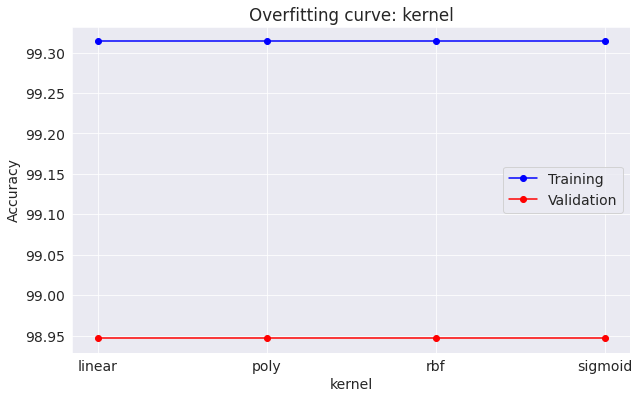

In [84]:
test_param_and_plot_SVC("kernel", ['linear', 'poly', 'rbf', 'sigmoid'])

Based on the results of hyperparameter tuning above, changing the values of some hyperparameter won't affect the accuracy of the machine learning models. Even though each of the model achieve a fairly high accuracy, the huge imbalance on the number of data between starts with and without exoplanet affects the accuracy of the models to be one sided on the class with higher number of data. 

In conclusion, even though each of the model achieved a high accuracy on the dataset, there is still the need of additional data for the stars with exoplanet which happens to be significanly lower in quanity. 

## Summary and References

The following topics were covered in this project:

- Downloading a real-world dataset
- Analyzing and Visualizing dataset
- Preparing a dataset for training
- Training a random forests classifier model
- Training an XGBoost classifier model
- Training a support vector machine classifier model
- Overfitting, hyperparameter tuning & regularization

Check out the following resources to learn more: 

- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data
- https://xgboost.readthedocs.io/en/latest/parameter.html
- https://scikit-learn.org/stable/modules/svm.html
- https://github.com/winterdelta/KeplerAI
- https://archive.stsci.edu/missions-and-data/k2